###  Importing Libraries and loading the dataset

In [1693]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv("./loan.csv", sep=",")

C:\Users\Parth R\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3058: DtypeWarning: Columns (47) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [1694]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(74), int64(13), object(24)
memory usage: 33.6+ MB


In [1695]:
df.shape

(39717, 111)

###  Data Cleaning

In [1696]:
#checking number of columns with more than 85% of null values 
null_columns = np.array(df.columns[100*(df.isnull().sum()/len(df.index))>85])
print(null_columns)

['mths_since_last_record' 'next_pymnt_d' 'mths_since_last_major_derog'
 'annual_inc_joint' 'dti_joint' 'verification_status_joint' 'tot_coll_amt'
 'tot_cur_bal' 'open_acc_6m' 'open_il_6m' 'open_il_12m' 'open_il_24m'
 'mths_since_rcnt_il' 'total_bal_il' 'il_util' 'open_rv_12m' 'open_rv_24m'
 'max_bal_bc' 'all_util' 'total_rev_hi_lim' 'inq_fi' 'total_cu_tl'
 'inq_last_12m' 'acc_open_past_24mths' 'avg_cur_bal' 'bc_open_to_buy'
 'bc_util' 'mo_sin_old_il_acct' 'mo_sin_old_rev_tl_op'
 'mo_sin_rcnt_rev_tl_op' 'mo_sin_rcnt_tl' 'mort_acc'
 'mths_since_recent_bc' 'mths_since_recent_bc_dlq' 'mths_since_recent_inq'
 'mths_since_recent_revol_delinq' 'num_accts_ever_120_pd' 'num_actv_bc_tl'
 'num_actv_rev_tl' 'num_bc_sats' 'num_bc_tl' 'num_il_tl' 'num_op_rev_tl'
 'num_rev_accts' 'num_rev_tl_bal_gt_0' 'num_sats' 'num_tl_120dpd_2m'
 'num_tl_30dpd' 'num_tl_90g_dpd_24m' 'num_tl_op_past_12m' 'pct_tl_nvr_dlq'
 'percent_bc_gt_75' 'tot_hi_cred_lim' 'total_bal_ex_mort' 'total_bc_limit'
 'total_il_high_credit

In [1697]:
#ropping columns with more than 85% of null values
df = df.drop(null_columns,axis=1)

In [1698]:
df.shape

(39717, 55)

In [1699]:
round(100*(df.isnull().sum()/len(df.index)), 2)

id                             0.00
member_id                      0.00
loan_amnt                      0.00
funded_amnt                    0.00
funded_amnt_inv                0.00
term                           0.00
int_rate                       0.00
installment                    0.00
grade                          0.00
sub_grade                      0.00
emp_title                      6.19
emp_length                     2.71
home_ownership                 0.00
annual_inc                     0.00
verification_status            0.00
issue_d                        0.00
loan_status                    0.00
pymnt_plan                     0.00
url                            0.00
desc                          32.58
purpose                        0.00
title                          0.03
zip_code                       0.00
addr_state                     0.00
dti                            0.00
delinq_2yrs                    0.00
earliest_cr_line               0.00
inq_last_6mths              

In [1700]:
# The column int_rate is character type, let's convert it to float
df['int_rate'] = df['int_rate'].apply(lambda x: pd.to_numeric(x.split("%")[0]))

In [1701]:
# There are now 2 columns having approx 32 and 64% missing values - 
# description and months since last delinquent

# let's have a look at a few entries in the columns
df.loc[:, ['desc', 'mths_since_last_delinq']].head()
df = df.drop(['desc', 'mths_since_last_delinq'], axis=1)
df.drop('id', axis=1)

,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,...,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
0,1296599,5000,5000,4975.0,36 months,10.65,162.87,B,B2,NaN,...,171.62,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
1,1314167,2500,2500,2500.0,60 months,15.27,59.83,C,C4,Ryder,...,119.66,Sep-13,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
2,1313524,2400,2400,2400.0,36 months,15.96,84.33,C,C5,NaN,...,649.91,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
3,1277178,10000,10000,10000.0,36 months,13.49,339.31,C,C1,AIR RESOURCES BOARD,...,357.48,Apr-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
4,1311748,3000,3000,3000.0,60 months,12.69,67.79,B,B5,University Medical Group,...,67.79,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39712,92174,2500,2500,1075.0,36 months,8.07,78.42,A,A4,FiSite Research,...,80.90,Jun-10,NaN,1,INDIVIDUAL,0,NaN,0,NaN,NaN
39713,90607,8500,8500,875.0,36 months,10.28,275.38,C,C1,"Squarewave Solutions, Ltd.",...,281.94,Jul-10,NaN,1,INDIVIDUAL,0,NaN,0,NaN,NaN
39714,90390,5000,5000,1325.0,36 months,8.07,156.84,A,A4,NaN,...,0.00,Jun-07,NaN,1,INDIVIDUAL,0,NaN,0,NaN,NaN
39715,89243,5000,5000,650.0,36 months,7.43,155.38,A,A2,NaN,...,0.00,Jun-07,NaN,1,INDIVIDUAL,0,NaN,0,NaN,NaN


In [1702]:
df.shape

(39717, 53)

In [1703]:
round(100*(df.isnull().sum()/len(df.index)), 2)

id                            0.00
member_id                     0.00
loan_amnt                     0.00
funded_amnt                   0.00
funded_amnt_inv               0.00
term                          0.00
int_rate                      0.00
installment                   0.00
grade                         0.00
sub_grade                     0.00
emp_title                     6.19
emp_length                    2.71
home_ownership                0.00
annual_inc                    0.00
verification_status           0.00
issue_d                       0.00
loan_status                   0.00
pymnt_plan                    0.00
url                           0.00
purpose                       0.00
title                         0.03
zip_code                      0.00
addr_state                    0.00
dti                           0.00
delinq_2yrs                   0.00
earliest_cr_line              0.00
inq_last_6mths                0.00
open_acc                      0.00
pub_rec             

#### Variable annual_inc


In [1704]:
df.annual_inc.describe(percentiles=[0.1, 0.25, 0.5, 0.75, 0.9])

count    3.971700e+04
mean     6.896893e+04
std      6.379377e+04
min      4.000000e+03
10%      3.000000e+04
25%      4.040400e+04
50%      5.900000e+04
75%      8.230000e+04
90%      1.160000e+05
max      6.000000e+06
Name: annual_inc, dtype: float64

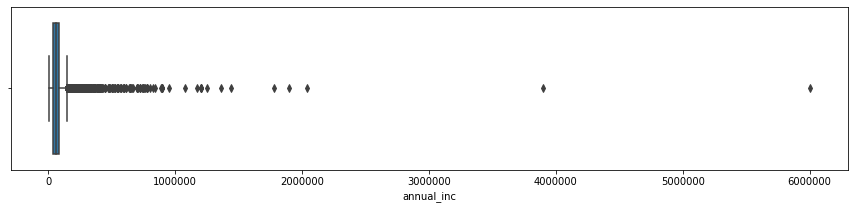

In [1705]:
plt.figure(figsize=(15, 3))
sns.boxplot(x= df['annual_inc'], data=df)

### Analysis

The annual income reprted by the borrowers range from min of 4,000 to max of 6,000,000. <mark>There are clearly people with distinctly large income who applying for relatively small loans (up to a maximum of 35,000).</mark>
<br> Median annual income is around 60,000
<br> Most people have an annual income less than 115000

In [1706]:
# Let's get rid of outliers to analyze annual income. 
# Keep only the ones that are within +3 to -3 standard deviations in the column 'Data'.
df = df[np.abs(df.annual_inc-df.annual_inc.mean()) <= (3*df.annual_inc.std())]

In [1707]:
df.annual_inc.describe()

count     39428.000000
mean      66025.261822
std       36433.688378
min        4000.000000
25%       40000.000000
50%       58500.000000
75%       81500.000000
max      260000.000000
Name: annual_inc, dtype: float64

# Data Analysis

In [1708]:
behav_variables = ["delinq_2yrs",
  "earliest_cr_line",
  "inq_last_6mths",
  "open_acc",
  "pub_rec",
  "revol_bal",
  "revol_util",
  "total_acc",
  "out_prncp",
  "out_prncp_inv",
  "total_pymnt",
  "total_pymnt_inv",
  "total_rec_prncp",
  "total_rec_int",
  "total_rec_late_fee",
  "recoveries",
  "collection_recovery_fee",
  "last_pymnt_d",
  "last_pymnt_amnt",
  "last_credit_pull_d",
  "application_type"]

In [1709]:
# let's now remove the behaviour variables from analysis
df.drop(behav_variables, axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 39428 entries, 0 to 39716
Data columns (total 53 columns):
id                            39428 non-null int64
member_id                     39428 non-null int64
loan_amnt                     39428 non-null int64
funded_amnt                   39428 non-null int64
funded_amnt_inv               39428 non-null float64
term                          39428 non-null object
int_rate                      39428 non-null float64
installment                   39428 non-null float64
grade                         39428 non-null object
sub_grade                     39428 non-null object
emp_title                     36996 non-null object
emp_length                    38357 non-null object
home_ownership                39428 non-null object
annual_inc                    39428 non-null float64
verification_status           39428 non-null object
issue_d                       39428 non-null object
loan_status                   39428 non-null object
pymnt_p

In [1710]:
# also, we will not be able to use the variables zip code, address, state etc.
# the variable 'title' is derived from the variable 'purpose'
# thus let get rid of all these variables as well

df = df.drop(['title', 'url', 'zip_code', 'addr_state'], axis=1)

In [1711]:
df['loan_status'] = df['loan_status'].astype('category')
df['loan_status'].value_counts()

Fully Paid     32700
Charged Off     5597
Current         1131
Name: loan_status, dtype: int64

In [1712]:
df = df[df['loan_status'].isin(['Fully Paid','Charged Off'])]

# filtering only fully paid or charged-off
df = df[df['loan_status'] != 'Current']

## Saving the backup for loan_status column
df['loan_status_org'] = df['loan_status']


df['loan_status'] = df['loan_status'].apply(lambda x: 0 if x=='Fully Paid' else 1)

# converting loan_status to integer type
df['loan_status'] = df['loan_status'].apply(lambda x: pd.to_numeric(x))

# summarising the values
df['loan_status'].value_counts()

0    32700
1     5597
Name: loan_status, dtype: int64

# Univariate Analysis

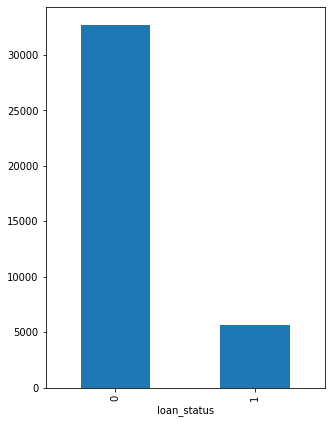

In [1713]:
plt.figure(figsize=(5,7))
ax = df.groupby('loan_status').loan_amnt.count().plot.bar()
plt.show()

### Analysis

On above Graph 0 indicates 'Fully Paid' and 1 indicates the 'Charged Off'

Approximately 14% of loans in the dataset are defaulted.
Any variable that increases percentage of default to higher than 16.5% should be considered a business risk. (16.5 is 18% higher than 13.97 - a large enough increase)

In [1714]:
# default rate
round(np.mean(df['loan_status']), 2)

0.15

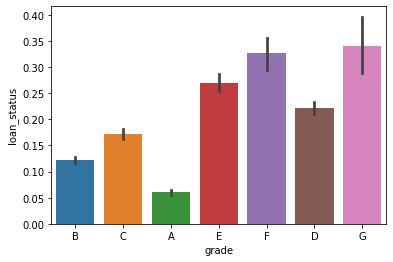

In [1715]:
# compare default rates across grade of loan
sns.barplot(x='grade', y='loan_status', data=df)
plt.show()

## Loan Status Vs Term

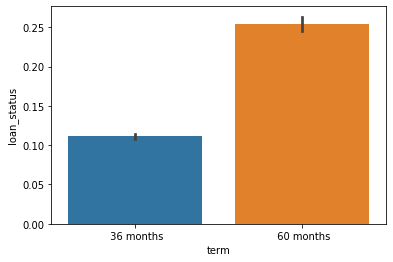

In [1716]:
sns.barplot(x='term', y='loan_status', data=df)
plt.show()


### Analysis

- Among Charged Off loans, percentage of term 60 months rises to 45%. The higher term loans have a higher chance of default.

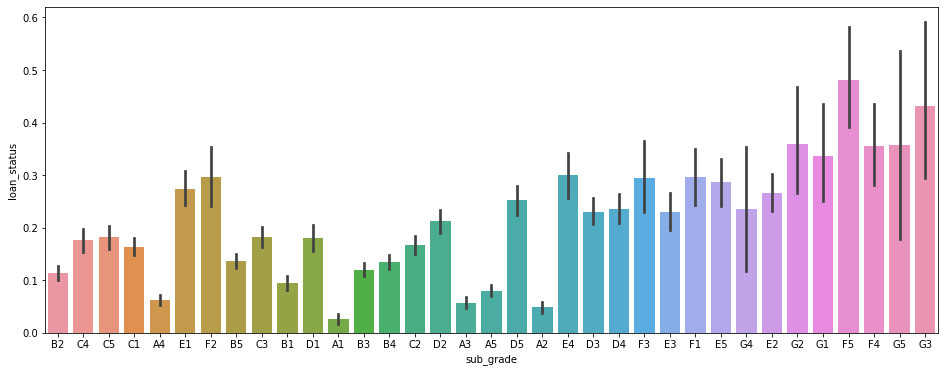

In [1717]:
# sub-grade: as expected - A1 is better than A2 better than A3 and so on 
plt.figure(figsize=(16, 6))
sns.barplot(x='sub_grade', y='loan_status', data=df)
plt.show()

## Loan Status Vs Home Ownership

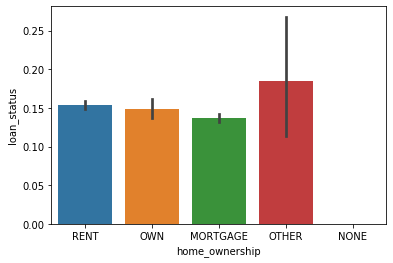

In [1718]:
# home ownership: not a great discriminsns.barplot(x='sub_grade', y='loan_status', data=df)
sns.barplot(x='home_ownership', y='loan_status', data=df)
plt.show()


## Loan Status Vs Verification status

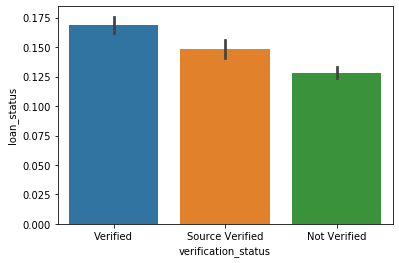

In [1719]:
# verification_status: surprisingly, verified loans default more than not verifiedb
sns.barplot(x='verification_status', y='loan_status', data=df)
plt.show()

### Analysis

- Verified loans are having high default rate then other

## Loan Status Vs Purpose

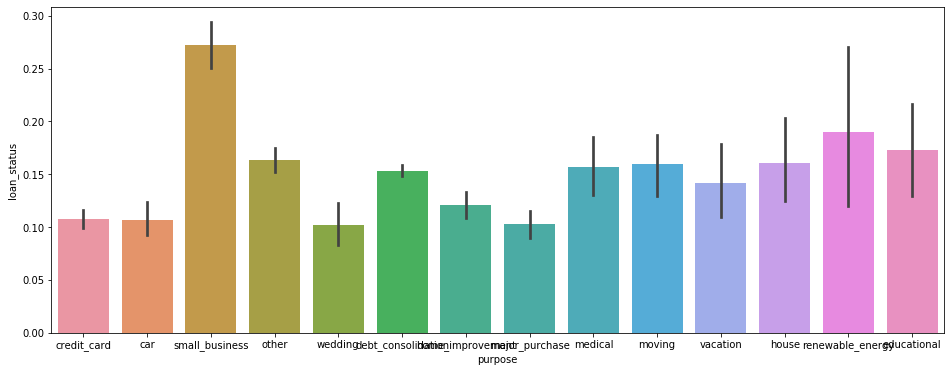

In [1720]:
plt.figure(figsize=(16, 6))
sns.barplot(x='purpose', y='loan_status', data=df)
plt.show()

###  Analysis

- 26% of loans for small business are Charged Off. Making them the most risky purpose.
- 17% of the loans for renewable_enrgy are charged Off, but the number is too less to be of significance.

## Derived Columns from issue_d

In [1721]:
# let's also observe the distribution of loans across years
# first lets convert the year column into datetime and then extract year and month from it
df['issue_d'].head()

0    Dec-11
1    Dec-11
2    Dec-11
3    Dec-11
5    Dec-11
Name: issue_d, dtype: object

In [1722]:
from datetime import datetime
df['issue_d'] = df['issue_d'].apply(lambda x: datetime.strptime(x, '%b-%y'))

In [1723]:
# extracting month and year from issue_date
df['month'] = df['issue_d'].apply(lambda x: x.month)
df['year'] = df['issue_d'].apply(lambda x: x.year)

In [1724]:
# let's first observe the number of loans granted across years
df.groupby('year').year.count()

year
2007      248
2008     1556
2009     4678
2010    11441
2011    20374
Name: year, dtype: int64

In [1725]:
# number of loans across months
df.groupby('month').month.count()

month
1     2359
2     2345
3     2668
4     2814
5     2896
6     3155
7     3331
8     3373
9     3469
10    3724
11    3978
12    4185
Name: month, dtype: int64

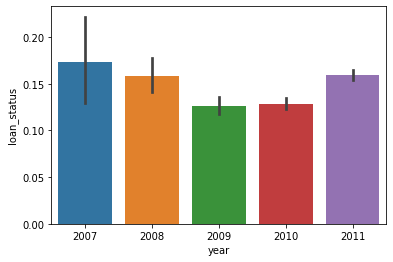

In [1726]:
# lets compare the default rates across years
# the default rate had suddenly increased in 2011, inspite of reducing from 2008 till 2010
sns.barplot(x='year', y='loan_status', data=df)
plt.show()

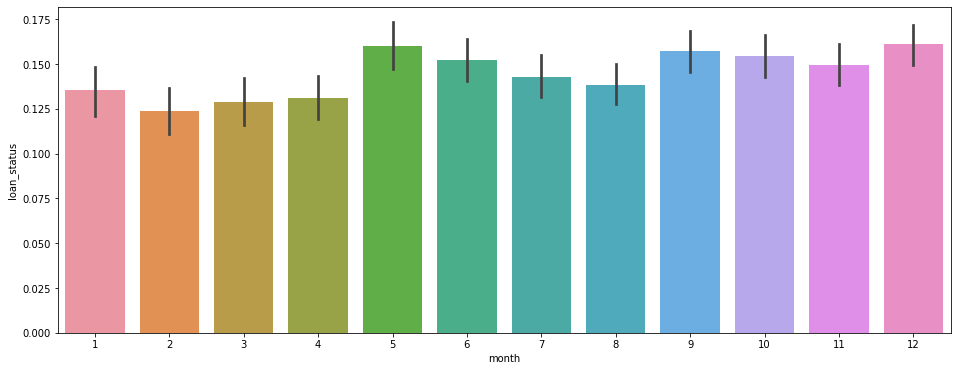

In [1727]:
plt.figure(figsize=(16, 6))
sns.barplot(x='month', y='loan_status', data=df)
plt.show()

### Analysis

- Over the years, LC as an organisation has been giving more loans. From Aug,2007 to 2011 the loans issued have risen significantly.
- Within a year, the number of loan issued rises over the month from jan to Dec. Dcember is the month of the year were the maximum number of loans are being issued
- Year of loan has no significant effect on likelihood of default.

## Loan Amount

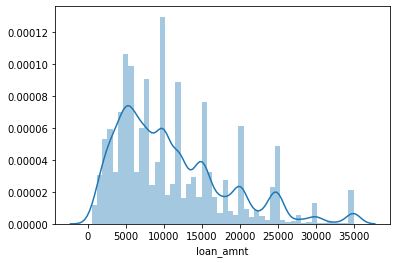

In [1728]:
# loan amount: the median loan amount is around 10,000
sns.distplot(df['loan_amnt'])
plt.show()

In [1729]:
# binning loan amount
df['loan_amnt_bin'] = df['loan_amnt']
def loan_amnt(n):
    if n < 5000:
        return 'low'
    elif n >=5000 and n < 15000:
        return 'medium'
    elif n >= 15000 and n < 25000:
        return 'high'
    else:
        return 'very high'
        
df['loan_amnt'] = df['loan_amnt'].apply(lambda x: loan_amnt(x))

In [1730]:
df['loan_amnt'].value_counts()

medium       20597
high          7624
low           7424
very high     2652
Name: loan_amnt, dtype: int64

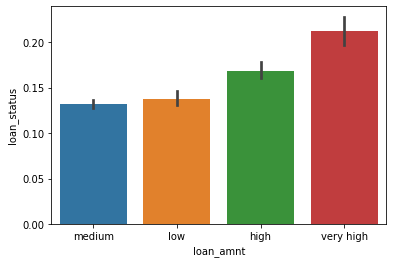

In [1731]:
# higher the loan amount, higher the default rate
sns.barplot(x='loan_amnt', y='loan_status', data=df)
plt.show()

In [1732]:
df.groupby('loan_status')['loan_amnt'].describe()

,count,unique,top,freq
loan_status,,,,
0,32700,4,medium,17877
1,5597,4,medium,2720


### Analysis

- Overall, the applied loan amount distribution is slightly right-skewed with mean greater than the median. Most of the loans granted are below 15000 (75 percentile value)
- Funding amounts see a spike around each 5000 boundary
- Charged off loans are shifted towards higher average loan amount request.

## Funded invested amount

In [1733]:
# let's also convert funded amount invested to bins
df['funded_amnt_inv'] = df['funded_amnt_inv'].apply(lambda x: loan_amnt(x))

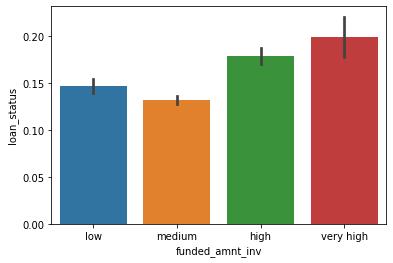

In [1734]:
# funded amount invested
sns.barplot(x='funded_amnt_inv', y='loan_status', data=df)
plt.show()

## Interest Rate

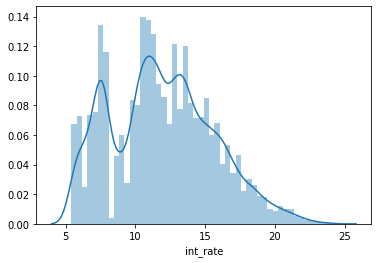

In [1735]:
# Interest rate dist plot
sns.distplot(df['int_rate'])
plt.show()

In [1736]:
# lets also convert interest rate to low, medium, high
# binning loan amount
def int_rate(n):
    if n <= 10:
        return 'low'
    elif n > 10 and n <=15:
        return 'medium'
    else:
        return 'high'
    
    
df['int_rate'] = df['int_rate'].apply(lambda x: int_rate(x))

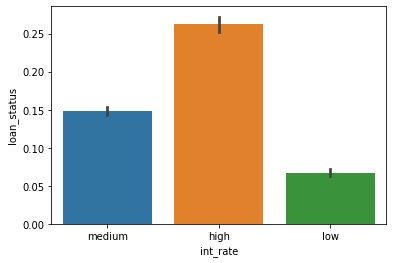

In [1737]:
# comparing default rates across rates of interest
# high interest rates default more, as expected
sns.barplot(x='int_rate', y='loan_status', data=df)
plt.show()

#### Analysis

- Overall, the intrest rate varies from 5.42% to 24.4% with average intrest rate of 11.8%.
- The intrest rate for Charged Off loans appear to be higher than for Fully paid. This is naturally expected. As, the risk increases the rate of interest imposed on the loan also increases. Let's analyze this more -

## DTI (Debt to Income Ratio)

In [1738]:
# debt to income ratio
def dti(n):
    if n <= 10:
        return 'low'
    elif n > 10 and n <=20:
        return 'medium'
    else:
        return 'high'
    

df['dti'] = df['dti'].apply(lambda x: dti(x))

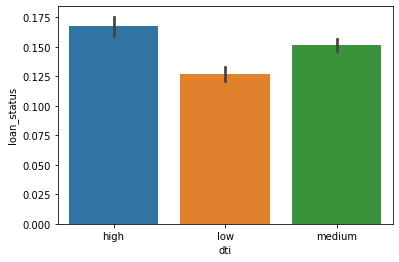

In [1739]:
# comparing default rates across debt to income ratio
# high dti translates into higher default rates, as expected
sns.barplot(x='dti', y='loan_status', data=df)
plt.show()

#### Analysis

- High dti results into high default rate and thus gives idea about risk factor. That if there is High DTI then the channces of Chrged OFF will get increase

## Funded Amount

In [1740]:
# funded amount
def funded_amount(n):
    if n <= 5000:
        return 'low'
    elif n > 5000 and n <=15000:
        return 'medium'
    else:
        return 'high'
    
df['funded_amnt'] = df['funded_amnt'].apply(lambda x: funded_amount(x))

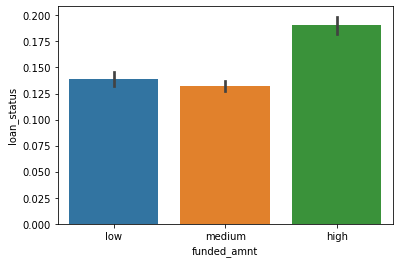

In [1741]:
sns.barplot(x='funded_amnt', y='loan_status', data=df)
plt.show()

## Installment

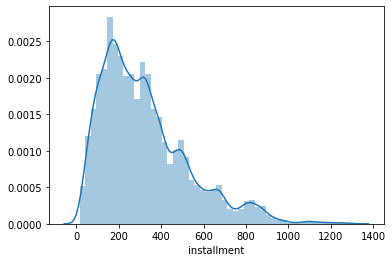

In [1742]:
# installment dist plot
sns.distplot(df['installment'])
plt.show()

In [1743]:
# installment
def installment(n):
    if n <= 200:
        return 'low'
    elif n > 200 and n <=400:
        return 'medium'
    elif n > 400 and n <=600:
        return 'high'
    else:
        return 'very high'
    
df['installment'] = df['installment'].apply(lambda x: installment(x))

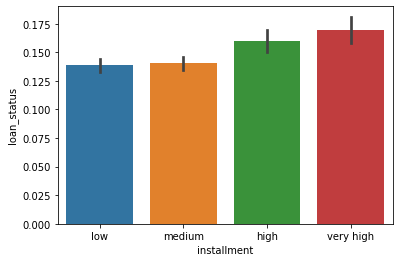

In [1744]:
# comparing default rates across installment
# the higher the installment amount, the higher the default rate
sns.barplot(x = 'installment', y = 'loan_status', data=df)
plt.show()

#### Analysis

- The higher the installement amount, the higher the default rate
- installment amount varies largely between 170.08 to 420 with median of 280 loans Charged Off have high installment on average

In [1745]:
# annual income
df['annual_inc_bin'] = df['annual_inc']
def annual_income(n):
    if n <= 50000:
        return 'low'
    elif n > 50000 and n <=100000:
        return 'medium'
    elif n > 100000 and n <=150000:
        return 'high'
    else:
        return 'very high'

df['annual_inc'] = df['annual_inc'].apply(lambda x: annual_income(x))

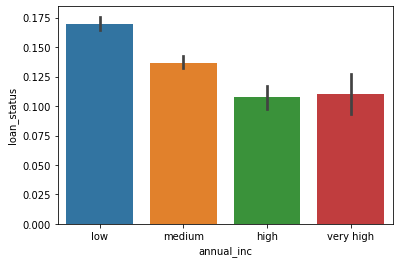

In [1746]:
# annual income and default rate
# lower the annual income, higher the default rate
sns.barplot(x= 'annual_inc', y= 'loan_status', data=df)
plt.show()

#### Analysis

- From the above graph we can see that, the lower the income higher will be the chance of getting Charged Off as the default rate is more.

# Segmented Analysis

We have now compared the default rates across various variables, and some of the important predictors are purpose of the loan, interest rate, annual income, grade etc.

In the credit industry, one of the most important factors affecting default is the purpose of the loan - home loans perform differently than credit cards, credit cards are very different from debt condolidation loans etc.

This comes from business understanding, though let's again have a look at the default rates across the purpose of the loan.

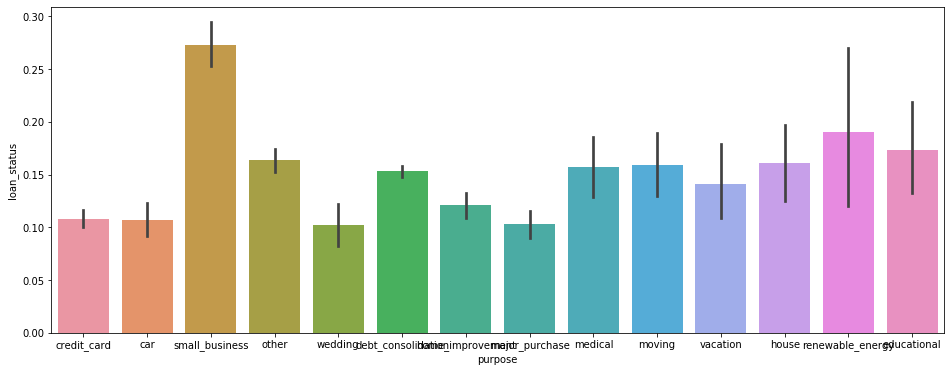

In [1747]:
# purpose: small business loans defualt the most, then renewable energy and education
plt.figure(figsize=(16, 6))
sns.barplot(x='purpose', y='loan_status', data=df)
plt.show()

In the upcoming analyses, we will segment the loan applications across the purpose of the loan, since that is a variable affecting many other variables - the type of applicant, interest rate, income, and finally the default rate.

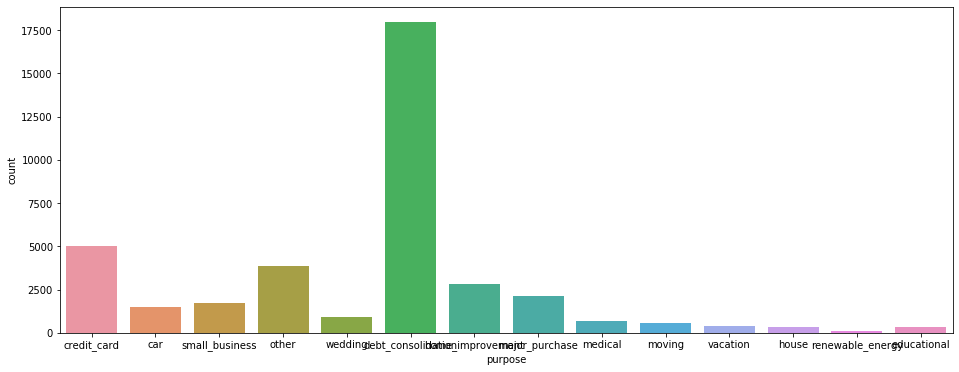

In [1748]:
# lets first look at the number of loans for each type (purpose) of the loan
# most loans are debt consolidation (to repay otehr debts), then credit card, major purchase etc.
plt.figure(figsize=(16, 6))
sns.countplot(x='purpose', data=df)
plt.show()

In [1749]:
# filtering the df for the 4 types of loans mentioned above
main_purposes = ["credit_card","debt_consolidation","home_improvement","major_purchase"]
df = df[df['purpose'].isin(main_purposes)]
df['purpose'].value_counts()

debt_consolidation    17953
credit_card            4997
home_improvement       2812
major_purchase         2135
Name: purpose, dtype: int64

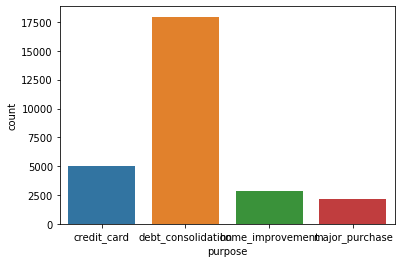

In [1750]:
# plotting number of loans by purpose 
sns.countplot(x=df['purpose'])
plt.show()

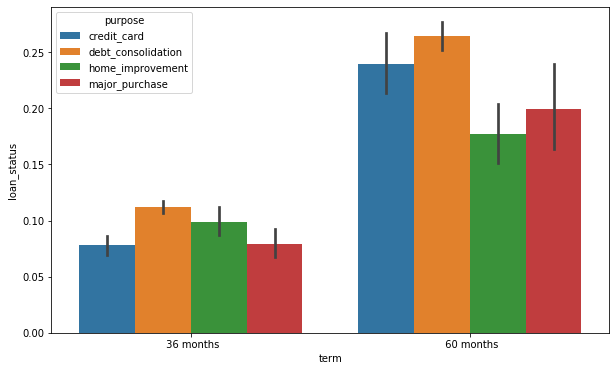

In [1751]:
# let's now compare the default rates across two types of categorical variables
# purpose of loan (constant) and another categorical variable (which changes)

plt.figure(figsize=[10, 6])
sns.barplot(x='term', y="loan_status", hue='purpose', data=df)
plt.show()

## Segment Plots

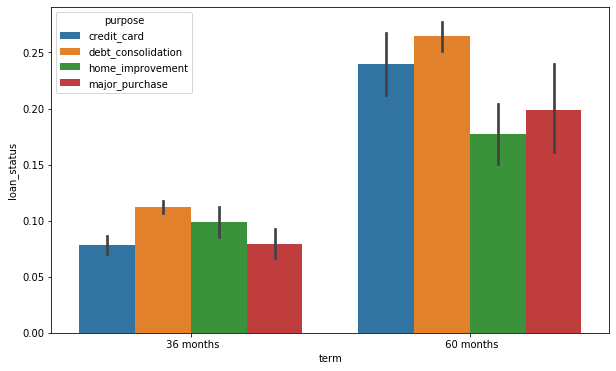

In [1752]:
plt.figure(figsize=(10, 6))
sns.barplot(x='term', y='loan_status', hue='purpose', data=df)
plt.show()

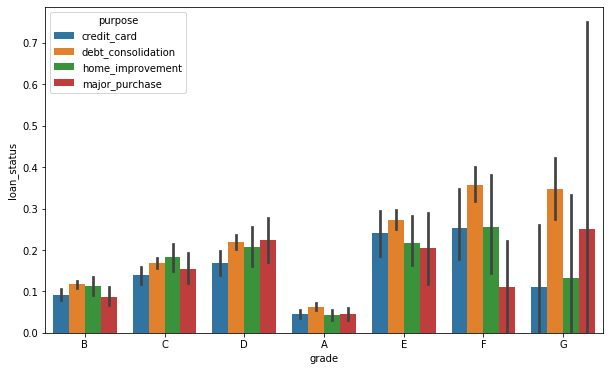

In [1753]:
plt.figure(figsize=(10, 6))
sns.barplot(x='grade', y='loan_status', hue='purpose', data=df)
plt.show()

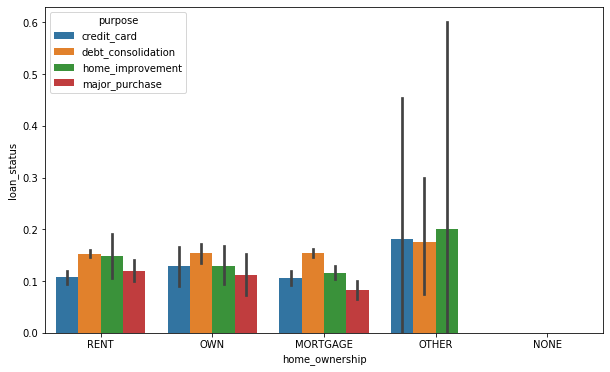

In [1754]:
plt.figure(figsize=(10, 6))
sns.barplot(x='home_ownership', y='loan_status', hue='purpose', data=df)
plt.show()

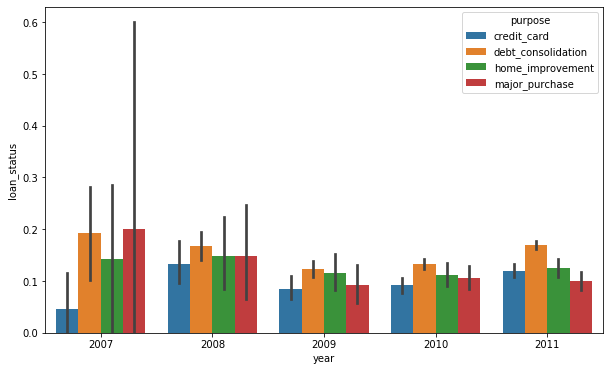

In [1755]:
plt.figure(figsize=(10, 6))
sns.barplot(x='year', y='loan_status', hue='purpose', data=df)
plt.show()

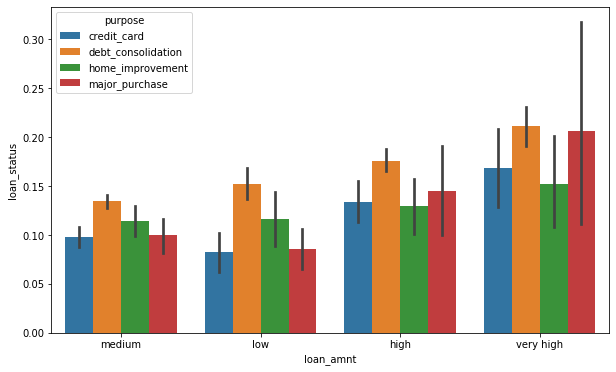

In [1756]:
plt.figure(figsize=(10, 6))
sns.barplot(x='loan_amnt', y='loan_status', hue='purpose', data=df)
plt.show()

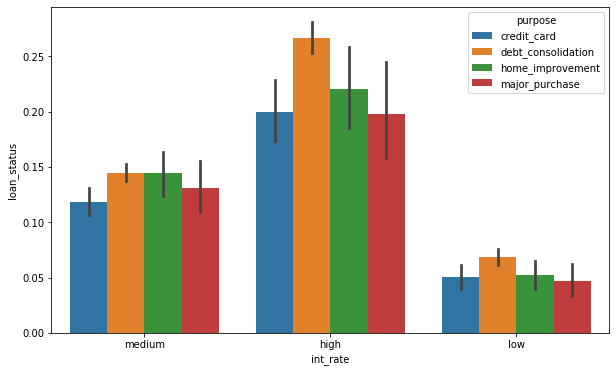

In [1757]:
plt.figure(figsize=(10, 6))
sns.barplot(x='int_rate', y='loan_status', hue='purpose', data=df)
plt.show()

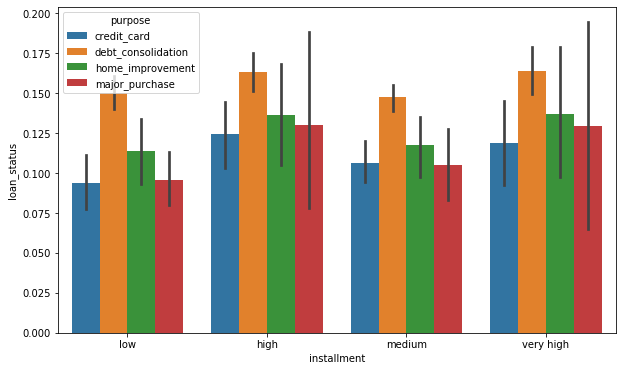

In [1758]:
plt.figure(figsize=(10, 6))
sns.barplot(x='installment', y='loan_status', hue='purpose', data=df)
plt.show()

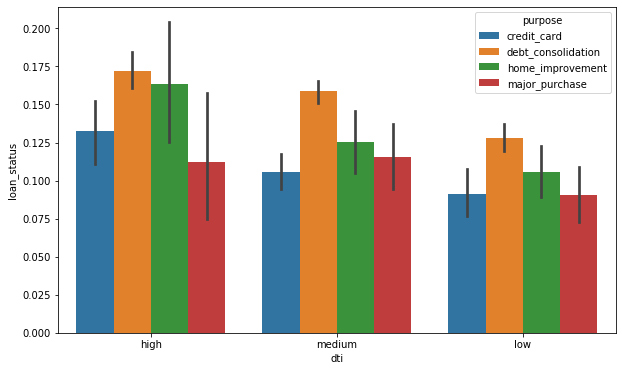

In [1759]:
plt.figure(figsize=(10, 6))
sns.barplot(x='dti', y='loan_status', hue='purpose', data=df)
plt.show()

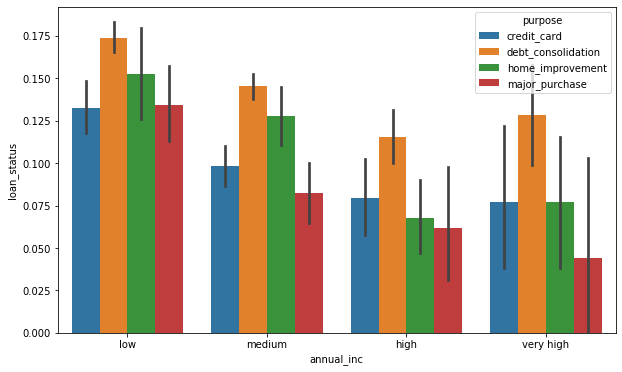

In [1760]:
plt.figure(figsize=(10, 6))
sns.barplot(x='annual_inc', y='loan_status', hue='purpose', data=df)
plt.show()

A good way to quantify th effect of a categorical variable on default rate is to see 'how much does the default rate vary across the categories'.

Let's see an example using annual_inc as the categorical variable.

In [1761]:
# variation of default rate across annual_inc
df.groupby('annual_inc').loan_status.mean().sort_values(ascending=False)

annual_inc
low          0.161748
medium       0.130881
very high    0.102157
high         0.097032
Name: loan_status, dtype: float64

In [1762]:
# one can write a function which takes in a categorical variable and computed the average 
# default rate across the categories
# It can also compute the 'difference between the highest and the lowest default rate' across the 
# categories, which is a decent metric indicating the effect of the varaible on default rate

def diff_rate(cat_var):
    default_rates = df.groupby(cat_var).loan_status.mean().sort_values(ascending=False)
    return (round(default_rates, 2), round(default_rates[0] - default_rates[-1], 2))

default_rates, diff = diff_rate('annual_inc')
print(default_rates) 
print(diff)

annual_inc
low          0.16
medium       0.13
very high    0.10
high         0.10
Name: loan_status, dtype: float64
0.06


In [1763]:
# filtering all the object type variables
df_categorical = df.loc[:, df.dtypes == object]
df_categorical['loan_status'] = df['loan_status']

# Now, for each variable, we can compute the incremental diff in default rates
print([i for i in df.columns])

['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title', 'emp_length', 'home_ownership', 'annual_inc', 'verification_status', 'issue_d', 'loan_status', 'pymnt_plan', 'purpose', 'dti', 'delinq_2yrs', 'earliest_cr_line', 'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc', 'initial_list_status', 'out_prncp', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries', 'collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt', 'last_credit_pull_d', 'collections_12_mths_ex_med', 'policy_code', 'application_type', 'acc_now_delinq', 'chargeoff_within_12_mths', 'delinq_amnt', 'pub_rec_bankruptcies', 'tax_liens', 'loan_status_org', 'month', 'year', 'loan_amnt_bin', 'annual_inc_bin']


C:\Users\Parth R\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [1764]:
default_rates, diff = diff_rate('loan_amnt')
print(default_rates) 
print(diff)

loan_amnt
very high    0.20
high         0.16
low          0.12
medium       0.12
Name: loan_status, dtype: float64
0.07


In [1765]:
default_rates, diff = diff_rate('installment')
print(default_rates) 
print(diff)

installment
high         0.15
very high    0.15
medium       0.13
low          0.13
Name: loan_status, dtype: float64
0.03


In [1766]:
# storing the diff of default rates for each column in a dict
d = {key: diff_rate(key)[1]*100 for key in df_categorical.columns if key != 'loan_status'}
print(d)

{'loan_amnt': 7.000000000000001, 'funded_amnt': 5.0, 'funded_amnt_inv': 6.0, 'term': 15.0, 'int_rate': 19.0, 'installment': 3.0, 'grade': 27.0, 'sub_grade': 44.0, 'emp_title': 100.0, 'emp_length': 3.0, 'home_ownership': 16.0, 'annual_inc': 6.0, 'verification_status': 4.0, 'pymnt_plan': 0.0, 'purpose': 5.0, 'dti': 5.0, 'earliest_cr_line': 100.0, 'revol_util': 100.0, 'initial_list_status': 0.0, 'last_pymnt_d': 75.0, 'last_credit_pull_d': 48.0, 'application_type': 0.0}


# Bivariate analysis

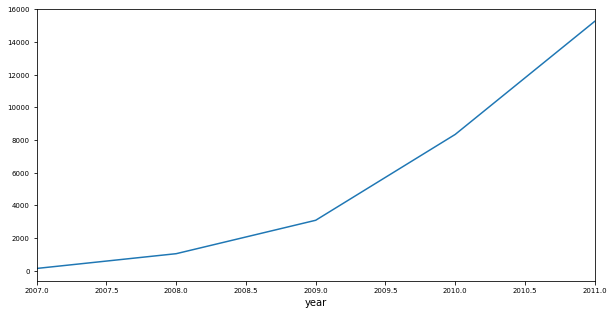

In [1767]:
plt.figure(figsize=(10,5))
df.groupby('year').loan_amnt.count().plot(kind='line', fontsize=7)
plt.show()

## Loan Amnt vs Annual Income

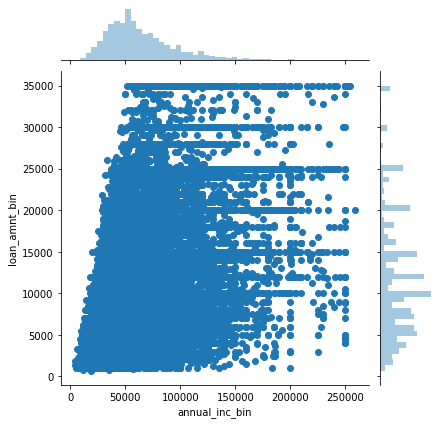

In [1768]:
sns.jointplot('annual_inc_bin', 'loan_amnt_bin', df.loc[df['annual_inc_bin']<260000])
plt.show()
#df['annual_inc_bin']

#### Analysis

There are people with average income lower than 50000 taking loans of 25000 or higher. These would be risky loans.

## Loan Amnt vs Grade

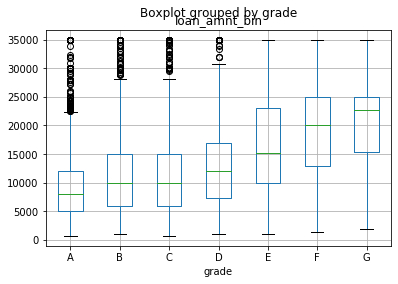

In [1769]:
df.boxplot(column='loan_amnt_bin', by='grade')
plt.show()

#### Analysis

- Larger loans generally appear to be given a lower grade, with the median loan amount for a grade G loan being almost 10000 higher than that of a grade A, B, or C loan.

## Annual Income Vs Grade

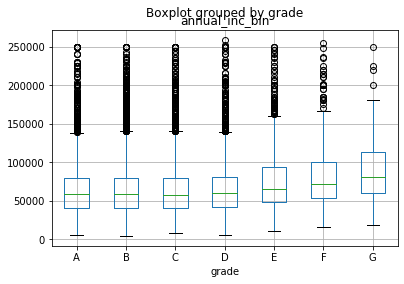

In [1770]:
df.loc[df['annual_inc_bin']<260000].boxplot(column='annual_inc_bin', by='grade')
plt.show()

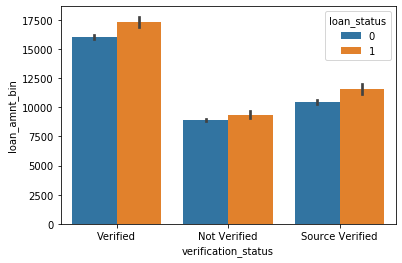

In [1771]:
sns.barplot(x='verification_status', y='loan_amnt_bin', hue="loan_status", data=df, estimator=np.mean)

#### Analysis

- Higher loan amounts are Verified more often.  
- We already know that larger loans are less in number, but see a higher charge off rate.
- <mark>This, combined with previous observation, explains why verfied loans see a higher rate of default.</mark> It's not the verified status per se, it's the fact that higher loan amounts are riskier and are also verified more often by Lending C
lub.

### Loan amount vs Grade vs Term

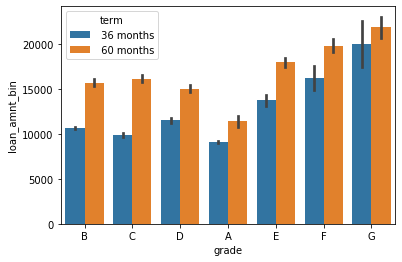

In [1772]:
sns.barplot(x='grade', y='loan_amnt_bin', hue="term", data=df, estimator=np.mean)
plt.show()

#### Analysis

- Higher loan amount are associated with lower grade for longer terms.

### Loan amount Vs term Vs Loan Status

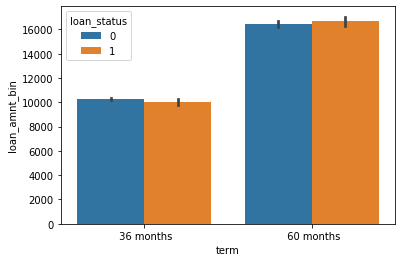

In [1773]:
sns.barplot(x='term', y='loan_amnt_bin', hue="loan_status", data=df, estimator=np.mean)
plt.show()

#### Analysis

- Higher loan amount are associated with longer terms and see higher Charge Offs.